In [1]:
# import geopandas as gpd;
# import geopy.distance;
import pandas as pd;
import numpy as np;

from sklearn import ensemble;
from sklearn.preprocessing import LabelEncoder;

import matplotlib.pyplot as plt;


# import warnings;
# warnings.filterwarnings("ignore");

from sklearn.model_selection import train_test_split;
pd.options.display.max_columns = 250;

In [2]:
typedict = {#'PID' : 'nominal',
            'SalePrice' : 'Continuous',
            #Matt
            'LotFrontage' : 'Continuous', 
            'LotArea' : 'Continuous',
            #'maybe_LotShape' : 'Nominal',
            'LandSlope' : 'Nominal', 
            'LandContour' : 'Nominal', 
            #'maybe_MSZoning' : 'Nominal', 
            'Street_paved' : 'Nominal', 
            'Alley' : 'Nominal',
            'Neighborhood' : 'Nominal', 
            #'drop_LotConfig' : 'nominal', 
            #'drop_Condition1' : 'nominal', 
            #'drop_Condition2' : 'nominal',
            'Foundation' : 'Nominal',
            'Utilities' : 'Nominal',
            #'Heating' : 'Nominal',
            #'drop_HeatingQC_nom' : 'Ordinal',
            'CentralAir' : 'Nominal',
            #'drop_Electrical' : 'Nominal',
            'HeatingQC_ord' : 'Ordinal',
            'LotShape_com' : 'Nominal',
            'MSZoning_com' : 'Nominal',
            #'LF_Normal' : 'nominal',
            'LF_Near_NS_RR' : 'Nominal',
            'LF_Near_Positive_Feature' : 'Nominal',
            'LF_Adjacent_Arterial_St' : 'Nominal',
            'LF_Near_EW_RR' : 'Nominal',
            'LF_Adjacent_Feeder_St' : 'Nominal',
            #'LF_Near_Postive_Feature' : 'Nominal',
            'Heating_com' : 'Nominal',
            'Electrical_com' : 'Nominal',
            'LotConfig_com' : 'Nominal', 
            'LotFrontage_log' : 'Continuous',
            'LotArea_log' : 'Continuous',
            #Oren 
            'MiscFeature': 'Nominal',
            'Fireplaces': 'Discrete',
            'FireplaceQu': 'Ordinal',
            'PoolQC': 'Ordinal',
            'PoolArea': 'Continuous',
            'PavedDrive': 'Nominal',
            'ExterQual': 'Ordinal',
            'OverallQual': 'Ordinal',
            'OverallCond': 'Ordinal',
            'MiscVal': 'Continuous',
            #'YearBuilt': 'Discrete',
            #'YearRemodAdd': 'Discrete',
            'KitchenQual': 'Ordinal',
            'Fence': 'Ordinal',
            'RoofStyle': 'Nominal',
            'RoofMatl': 'Nominal',
            #'maybe_Exterior1st': 'Nominal',
            #'drop_Exterior2nd': 'Nominal',
            'ExterCond': 'Ordinal',
            'MasVnrType': 'Nominal',
            'MasVnrArea': 'Continuous',
            #Mo
            #Basement
            'BsmtQual_ord': 'Ordinal',
            'BsmtCond_ord': 'Ordinal',
            'BsmtExposure_ord': 'Ordinal',
            #'BsmtQual_ord_lin': 'Ordinal',
            #'BsmtCond_ord_lin': 'Ordinal',
            #'BsmtExposure_ord_lin': 'Ordinal',
            'TotalBsmtSF': 'Continuous',
            'BSMT_GLQ':'Continuous', 
            'BSMT_Rec':'Continuous',
            'BsmtUnfSF': 'Continuous',
            'BSMT_ALQ':'Continuous',
            'BSMT_BLQ':'Continuous', 
            'BSMT_LwQ':'Continuous', 
            #'drop_BsmtQual': 'Nominal',
            #'drop_BsmtCond': 'Nominal',
            #'drop_BsmtExposure': 'Nominal',
            #'drop_BsmtFinType1': 'Nominal',
            #'drop_BsmtFinSF1': 'Continuous',
            #'drop_BsmtFinType2': 'Nominal',
            #'drop_BsmtFinSF2': 'Continuous',
            #Deck
            'WoodDeckSF':'Continuous', 
            'OpenPorchSF':'Continuous', 
            'ScreenPorch':'Continuous',
            'EnclosedPorch':'Continuous',
            '3SsnPorch':'Continuous',
            #Garage
            'GarageFinish':'Nominal', 
            #'GarageYrBlt':'Continuous',
            'GarageCars':'Ordinal',
            'GarageArea':'Continuous',
            'GarageType_com':'Nominal',
            'GarageQual':'Nominal', 
            'GarageCond':'Nominal',
            #'drop_GarageType':'Nominal',

            # Hao-Wei
            "SaleType": "Nominal",
            "BldgType": "Nominal",
            "Functional_ord": "Ordinal", # Changed from "Functional"
            "1stFlrSF": "Continuous",
            "2ndFlrSF": "Continuous",
            "LowQualFinSF": "Continuous", # Rejectable p-value
            "GrLivArea": "Continuous",
            "BsmtFullBath": "Discrete",
            "BsmtHalfBath": "Discrete", # Rejectable p-value
            "FullBath": "Discrete",
            "HalfBath": "Discrete",
            "BedroomAbvGr": "Discrete",
            "KitchenAbvGr": "Discrete",
            "TotRmsAbvGrd": "Discrete",
            "MoSold": "Discrete", # Rejectable p-value
            "YrSold": "Discrete", # Rejectable p-value
            ####### Below are columns created by myself #######
            #"Functional_dis": "Discrete", # Functional in a (Salvage) 0-7 (Full) scale.
            "1stFlrSF_log": "Continuous",
            "2ndFlrSF_log": "Continuous",
            "GrLivArea_log": "Continuous",
            "number_floors": "Discrete",
            "attic": "Ordinal",
            "PUD": "Nominal",
            #### Whose?
            "SaleCondition": "Nominal",
            "SalePrice_log": "Continuous",
            #"drop_MS_Coded": "Nominal",
            "sold_datetime": "Discrete",
    
            #### New in version 3:
            'ext_Wood_Siding': "Discrete",
            'ext_Hard_Board': "Discrete",
            'ext_Metal_Siding': "Discrete",
            'ext_Vinyl_Siding': "Discrete",
            'ext_Wood_Shingles': "Discrete",
            'ext_Plywood': "Discrete",
            'ext_Stucco': "Discrete",
            'ext_Cement_Board': "Discrete",
            'ext_Face_Brick': "Discrete",
            'ext_Asbestos_Shingles': "Discrete",
            'ext_Common_Brick': "Discrete",
            'ext_Imitation_Stucco': "Discrete",
            'ext_Other': "Discrete",
            #'sold_age_years': "Continuous"
    
            #### New in version 4
            'Garage_age_years': "Continuous",
            'Garage_age_bin': "Ordinal",
            'house_age_years': "Continuous",
            'Remod_age_years': "Continuous",
            'Remod_age_bin': "Ordinal"
}

In [3]:
keys_list = list(typedict.keys());
house_list = housing.columns;


# for k in keys_list:
#     if k not in house_list:
#         print(k);

for k in house_list:
    if k not in keys_list:
        print(k);

NameError: name 'housing' is not defined

In [4]:
housing_coords = pd.read_csv('../data/house_coordinates_0.25.csv', index_col = 0);

In [5]:
housing = pd.read_csv('../data/ames_housing_price_data_v4.csv', index_col = 0);

In [6]:
test = housing.merge(housing_coords, how = "inner", left_index = True, right_index = True);

In [7]:
test = housing_coords.drop(["Address", "Coords4", "latitude", "longitude"], axis = 1);

In [8]:
test.sort_values("PID", ascending = True, inplace = True);

In [9]:
test2 = test.merge(housing["SalePrice"], left_index = True, right_index = True);

In [10]:
x = housing;
y = housing["SalePrice_log"];

### Data preparation for gradient boosting methods

In [11]:
attic_dict = {"No attic": 0, "Finished": 2, "Unfinished": 1};
fence_dict = {"No Fence": 0, "Minimum Privacy": 3, "Good Privacy": 4, "Good Wood": 2 , "Minimum Wood/Wire": 1};
Garage_age_bin_dict = {"No garage":0, "60+": 1, "40-60": 2, "20-40": 3, "0-20":4};
Remod_age_bin_dict = {"No remodel": 0, "45+": 1, "30-45": 2, "15-30": 3, "0-15":4};

In [12]:
# Drop the column sold_datetime and replace with a column which computes the time elapsed since 2006-01.
# I don't like sold_datetime much, and sklearn often have difficulty understanding it.

x.drop("sold_datetime", axis = 1, inplace = True);
x["Months_Elapsed"] = 12*(x["YrSold"]-2006) + x["MoSold"];
x["attic"] = x.apply(lambda t: attic_dict[t["attic"]], axis = 1);
x["Fence"] = x.apply(lambda t: fence_dict[t["Fence"]], axis = 1);

x["Garage_age_bin"] = x.apply(lambda t: Garage_age_bin_dict[t["Garage_age_bin"]], axis = 1);
x["Remod_age_bin"] = x.apply(lambda t: Remod_age_bin_dict[t["Remod_age_bin"]], axis = 1);

typedict["Months_Elapsed"] = "Discrete";

In [13]:
col_num = [w for w in x.columns if typedict[w] in ["Continuous", "Discrete", "Ordinal"]];
col_nom = [w for w in x.columns if typedict[w] == "Nominal"];
# TODO: Not avery ordinal variables are in the machine understandable way.
# Fix: HeatingQC_nom, Fence, attic

x_num = x[col_num];
x_nom = x[col_nom];

In [15]:
# Encode all nominal and ordinal variables.

lencoder = LabelEncoder();

temp = pd.DataFrame({"SalePrice": x["SalePrice"]});
for col_name in col_nom:
    # temp = lencoder.fit_transform(np.array(str(x[[col_name]])).reshape(-1,1));
    temp[col_name] = np.array(lencoder.fit_transform(x[col_name].astype(str))).reshape(-1,1);
    
temp.drop("SalePrice", axis = 1, inplace = True);

In [16]:
# Add the positional data here later.
x = pd.concat([x_num, temp], axis = 1);

In [18]:
x["SaleCondition"].value_counts()

4    2413
5      82
0      61
3      17
2       4
1       2
Name: SaleCondition, dtype: int64

In [17]:
# Implementing Matt's idea on 8/27
# x = x[(x["SaleCondition"] == 4) | (x["SaleCondition"] == 5)]; # 4=Normal, 5=Partial. shape=(2495, 105)
x.drop(["YrSold", "MoSold", "Months_Elapsed", "SaleType"], axis = 1, inplace = True); # (2495, 99)

In [18]:
y = x["SalePrice"];
ylog = x["SalePrice_log"];

x.drop(["SalePrice", "SalePrice_log"], axis = 1, inplace = True); # (2495, 99)

In [19]:
log_col = [lg for lg in x.columns if lg.find("log") != -1];
x.drop(log_col, axis = 1, inplace = True); #(2495, 94)

In [143]:
x2 = x.merge(test, how="inner", left_index = True, right_index = True);

### Cat boosting with location information included

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, ylog, test_size=0.3, random_state=0);

In [23]:
from catboost import CatBoostRegressor;

cat = CatBoostRegressor();
cat.set_params(random_state=0);
cat.fit(x_train, y_train);

Learning rate set to 0.043356
0:	learn: 0.1595341	total: 59.4ms	remaining: 59.3s
1:	learn: 0.1549952	total: 62.4ms	remaining: 31.1s
2:	learn: 0.1504139	total: 65ms	remaining: 21.6s
3:	learn: 0.1464110	total: 67.6ms	remaining: 16.8s
4:	learn: 0.1425940	total: 70.3ms	remaining: 14s
5:	learn: 0.1388763	total: 73ms	remaining: 12.1s
6:	learn: 0.1351720	total: 75.8ms	remaining: 10.7s
7:	learn: 0.1318783	total: 78.4ms	remaining: 9.72s
8:	learn: 0.1283530	total: 81.3ms	remaining: 8.95s
9:	learn: 0.1249878	total: 84ms	remaining: 8.31s
10:	learn: 0.1218030	total: 86.6ms	remaining: 7.78s
11:	learn: 0.1187103	total: 89.2ms	remaining: 7.34s
12:	learn: 0.1160158	total: 91.9ms	remaining: 6.97s
13:	learn: 0.1133664	total: 94.6ms	remaining: 6.66s
14:	learn: 0.1108025	total: 97.2ms	remaining: 6.38s
15:	learn: 0.1082367	total: 99.8ms	remaining: 6.14s
16:	learn: 0.1059643	total: 102ms	remaining: 5.92s
17:	learn: 0.1036231	total: 105ms	remaining: 5.73s
18:	learn: 0.1013195	total: 108ms	remaining: 5.56s
19:

184:	learn: 0.0383951	total: 582ms	remaining: 2.56s
185:	learn: 0.0383110	total: 585ms	remaining: 2.56s
186:	learn: 0.0382380	total: 588ms	remaining: 2.56s
187:	learn: 0.0381775	total: 591ms	remaining: 2.55s
188:	learn: 0.0381273	total: 594ms	remaining: 2.55s
189:	learn: 0.0380819	total: 597ms	remaining: 2.54s
190:	learn: 0.0380156	total: 600ms	remaining: 2.54s
191:	learn: 0.0379506	total: 604ms	remaining: 2.54s
192:	learn: 0.0378576	total: 607ms	remaining: 2.54s
193:	learn: 0.0378021	total: 610ms	remaining: 2.53s
194:	learn: 0.0377469	total: 613ms	remaining: 2.53s
195:	learn: 0.0376778	total: 616ms	remaining: 2.53s
196:	learn: 0.0376338	total: 619ms	remaining: 2.52s
197:	learn: 0.0376004	total: 621ms	remaining: 2.52s
198:	learn: 0.0375347	total: 624ms	remaining: 2.51s
199:	learn: 0.0374694	total: 627ms	remaining: 2.51s
200:	learn: 0.0374158	total: 630ms	remaining: 2.5s
201:	learn: 0.0373670	total: 633ms	remaining: 2.5s
202:	learn: 0.0373053	total: 638ms	remaining: 2.5s
203:	learn: 0.0

384:	learn: 0.0286174	total: 1.17s	remaining: 1.86s
385:	learn: 0.0285837	total: 1.17s	remaining: 1.86s
386:	learn: 0.0285601	total: 1.17s	remaining: 1.86s
387:	learn: 0.0285229	total: 1.18s	remaining: 1.85s
388:	learn: 0.0284839	total: 1.18s	remaining: 1.85s
389:	learn: 0.0284466	total: 1.18s	remaining: 1.85s
390:	learn: 0.0284147	total: 1.18s	remaining: 1.84s
391:	learn: 0.0283738	total: 1.19s	remaining: 1.84s
392:	learn: 0.0283375	total: 1.19s	remaining: 1.84s
393:	learn: 0.0282884	total: 1.19s	remaining: 1.84s
394:	learn: 0.0282519	total: 1.2s	remaining: 1.83s
395:	learn: 0.0282146	total: 1.2s	remaining: 1.83s
396:	learn: 0.0281859	total: 1.2s	remaining: 1.83s
397:	learn: 0.0281505	total: 1.21s	remaining: 1.82s
398:	learn: 0.0281194	total: 1.21s	remaining: 1.82s
399:	learn: 0.0280798	total: 1.21s	remaining: 1.82s
400:	learn: 0.0280421	total: 1.21s	remaining: 1.81s
401:	learn: 0.0279847	total: 1.22s	remaining: 1.81s
402:	learn: 0.0279720	total: 1.22s	remaining: 1.81s
403:	learn: 0.0

590:	learn: 0.0227824	total: 1.75s	remaining: 1.21s
591:	learn: 0.0227650	total: 1.75s	remaining: 1.21s
592:	learn: 0.0227434	total: 1.75s	remaining: 1.2s
593:	learn: 0.0227220	total: 1.76s	remaining: 1.2s
594:	learn: 0.0226992	total: 1.76s	remaining: 1.2s
595:	learn: 0.0226867	total: 1.76s	remaining: 1.19s
596:	learn: 0.0226679	total: 1.76s	remaining: 1.19s
597:	learn: 0.0226488	total: 1.77s	remaining: 1.19s
598:	learn: 0.0226174	total: 1.77s	remaining: 1.18s
599:	learn: 0.0226101	total: 1.77s	remaining: 1.18s
600:	learn: 0.0226032	total: 1.77s	remaining: 1.18s
601:	learn: 0.0225863	total: 1.78s	remaining: 1.18s
602:	learn: 0.0225650	total: 1.78s	remaining: 1.17s
603:	learn: 0.0225298	total: 1.78s	remaining: 1.17s
604:	learn: 0.0225076	total: 1.79s	remaining: 1.17s
605:	learn: 0.0224797	total: 1.79s	remaining: 1.16s
606:	learn: 0.0224633	total: 1.79s	remaining: 1.16s
607:	learn: 0.0224430	total: 1.79s	remaining: 1.16s
608:	learn: 0.0224176	total: 1.8s	remaining: 1.15s
609:	learn: 0.02

800:	learn: 0.0188449	total: 2.33s	remaining: 579ms
801:	learn: 0.0188230	total: 2.33s	remaining: 576ms
802:	learn: 0.0188119	total: 2.34s	remaining: 573ms
803:	learn: 0.0188090	total: 2.34s	remaining: 570ms
804:	learn: 0.0188003	total: 2.34s	remaining: 567ms
805:	learn: 0.0187792	total: 2.35s	remaining: 565ms
806:	learn: 0.0187613	total: 2.35s	remaining: 562ms
807:	learn: 0.0187407	total: 2.35s	remaining: 559ms
808:	learn: 0.0187324	total: 2.35s	remaining: 556ms
809:	learn: 0.0187128	total: 2.36s	remaining: 553ms
810:	learn: 0.0187111	total: 2.36s	remaining: 550ms
811:	learn: 0.0187007	total: 2.36s	remaining: 547ms
812:	learn: 0.0186975	total: 2.37s	remaining: 545ms
813:	learn: 0.0186959	total: 2.37s	remaining: 542ms
814:	learn: 0.0186730	total: 2.37s	remaining: 539ms
815:	learn: 0.0186657	total: 2.38s	remaining: 536ms
816:	learn: 0.0186645	total: 2.38s	remaining: 533ms
817:	learn: 0.0186483	total: 2.38s	remaining: 531ms
818:	learn: 0.0186420	total: 2.39s	remaining: 528ms
819:	learn: 

### Saving a catboost model

In [57]:
housing_coords.reset_index()
housing_coords["Address"] = housing_coords["Address"].apply(lambda x:x[:-17])
housing_coords

,Address,Coords4,latitude,longitude,2001_police,2002_fire_station,2004_post_box,2005_post_office,2007_library,2008_town_hall,2013_nursing_home,2015_graveyard,2081_university,2082_school,2101_pharmacy,2110_hospital,2120_doctors,2121_dentist,2129_veterinary,2201_theatre,2203_cinema,2204_park,2205_playground,2206_dog_park,2251_sports_centre,2252_pitch,2253_swimming_pool,2255_golf_course,2256_stadium,2258_track,2301_restaurant,2302_fast_food,2303_cafe,2304_pub,2305_bar,2306_food_court,2401_hotel,2402_motel,2404_guesthouse,2421_shelter,2422_camp_site,2501_supermarket,2502_bakery,2504_mall,2505_department_store,2510_general,2511_convenience,2512_clothes,2513_florist,2515_bookshop,2517_shoe_shop,2518_beverages,2519_optician,2520_jeweller,2521_gift_shop,2522_sports_shop,2523_stationery,2524_outdoor_shop,2525_mobile_phone_shop,2529_beauty_shop,2541_car_dealership,2542_bicycle_shop,2543_doityourself,2544_furniture_shop,2546_computer_shop,2547_garden_centre,2561_hairdresser,2564_car_wash,2568_laundry,2601_bank,2602_atm,2701_tourist_info,2721_attraction,2722_museum,2724_memorial,2725_artwork,2741_picnic_site,2742_viewpoint,2901_toilet,2902_bench,2903_drinking_water,2904_fountain,2906_waste_basket,2907_camera_surveillance,2950_tower,2951_comms_tower,2952_water_tower,2961_wastewater_plant,2964_water_works,3100_christian,3102_christian_catholic,3103_christian_evangelical,3104_christian_lutheran,3105_christian_methodist,3200_jewish,3300_muslim,4101_spring,4121_tree,4141_beach,5201_traffic_signals,5203_stop,5204_crossing,5206_motorway_junction,5207_turning_circle,5209_street_lamp,5250_fuel,5260_parking,5262_parking_multistorey,5270_parking_bicycle,5301_slipway,5303_pier,5311_dam,5332_weir,5621_bus_stop,5651_airport,5655_helipad,5656_apron,7201_forest,7202_park,7203_residential,7204_industrial,7206_cemetery,7208_meadow,7209_commercial,7210_nature_reserve,7211_recreation_ground,7212_retail,7215_orchard,7216_vineyard,7217_scrub,7218_grass,7228_farmyard,7229_farmland,8200_water,8201_reservoir,8221_wetland
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
909176150,436 HAYWARD AVE,"436 Hayward Ave, Ames, IA 50014, USA",42.017780,-93.651452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,4,0,1,0,2,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,0,0,0,1,11,1,1,0,0,0,0,8,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
905476230,3416 WEST ST,"3416 West St, Ames, IA 50014, USA",42.024697,-93.664186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,2,0,59,0,3,0,1,5,0,0,0,0,0,0,4,0,0,0,1,1,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
911128020,320 S 2ND ST,"320 S 2nd St, Ames, IA 50010, USA",42.021389,-93.614855,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,11,2,0,0,0,1,0,0,0,0,0,0,0,1,0,2,2,1,0,1,2,0,0,1,0,0,0,0,1,0,2,0,0,1,0,3,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,8,0,5,0,178,0,0,0,2,6,0,1,0,0,0,0,12,0,0,0,0,1,2,0,0,0,14,0,0,1,0,0,0,3,0,0,0,0,0
535377150,1524 DOUGLAS AVE,"1524 Douglas Ave, Ames, IA 50010, USA",42.038070,-93.612065,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,47,0,0,0,0,0,0,2,0,0,0,0,6,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
534177230,2304 FILLMORE AVE,"2304 Fillmore Ave, Ames, IA 50010, USA",42.044900,-93.631893,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [55]:
temp = "ieojrqjifoejiowjfioj";
temp[:-3]

'ieojrqjifoejiowjf'

In [39]:
temp = pd.DataFrame({"PID": [1002 for i in range(10)], "OverallQual": range(1,11,1)})

In [30]:
cat.save_model("woof.meow", "cbm")

In [31]:
lion = CatBoostRegressor();
lion.load_model("woof.meow", "cbm")
print(lion.score(x_test, y_test))

0.9187957628884161


In [24]:
print(cat.score(x_train, y_train));
print(cat.score(x_test, y_test)); # Best in the congress so far. 0.9499

0.9904962484083824
0.9187957628884161


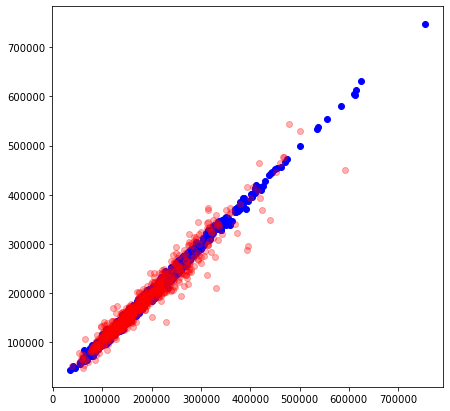

In [150]:
pred_train = cat.predict(x_train);
pred_test = cat.predict(x_test);

from matplotlib.pyplot import figure;

figure(figsize=(7,7));
plt.scatter(y_train, pred_train, color = 'b');
plt.scatter(y_test, pred_test, color = 'r', alpha=0.3);
plt.show();

In [151]:
### How many of the test datas are within 20% error?
print(sum(abs((pred_test-y_test)/y_test) <= 0.2)/y_test.shape[0]*100, "percent of the test data are predicted with < 20% error.")
print(sum(abs((pred_test-y_test)/y_test) <= 0.1)/y_test.shape[0]*100, "percent of the test data are predicted with < 10% error.") # ~78.2% of the test data have error < 10%
print(sum(abs((pred_test-y_test)/y_test) <= .05)/y_test.shape[0]*100, "percent of the test data are predicted with <  5% error.") # ~49.6% of the test data have error < 5%

96.12817089452604 percent of the test data are predicted with < 20% error.
80.24032042723631 percent of the test data are predicted with < 10% error.
49.265687583444596 percent of the test data are predicted with <  5% error.


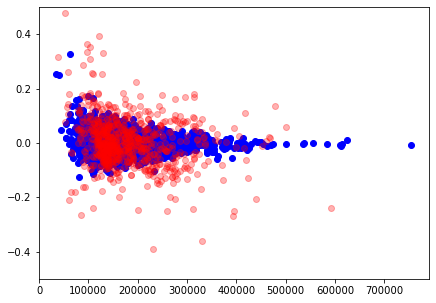

In [152]:
figure(figsize=(7,5));
plt.scatter(y_train, (pred_train-y_train)/y_train, color = 'b');
plt.scatter(y_test, (pred_test-y_test)/y_test, color = 'r', alpha=0.3);
plt.ylim([-0.5,0.5]);
plt.show();

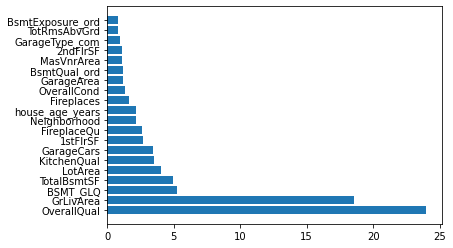

In [154]:
feature_importance = pd.DataFrame({"Features": x2.columns, "Importance":cat.feature_importances_});
feature_importance.sort_values("Importance", ascending = False, inplace=True);

temp = feature_importance.iloc[:20,]
plt.barh(temp["Features"], temp["Importance"]);

### Bulk testing

In [157]:
training_accuracy_1 = [];
testing_accuracy_1 = [];
training_accuracy_2 = [];
testing_accuracy_2 = [];

for i in range(100):
    print(i, "-th trial without vincinity information")
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3);
    
    cat = CatBoostRegressor();
    cat.set_params(verbose=0);
    cat.fit(x_train, y_train);
    
    training_accuracy_1.append(cat.score(x_train, y_train));
    testing_accuracy_1.append(cat.score(x_test, y_test));
    
for i in range(100):
    print(i, "-th trial with vincinity information")
    x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.3);
    
    cat = CatBoostRegressor();
    cat.set_params(verbose=0);
    cat.fit(x_train, y_train);
    
    training_accuracy_2.append(cat.score(x_train, y_train));
    testing_accuracy_2.append(cat.score(x_test, y_test));


0 -th trial without vincinity information
1 -th trial without vincinity information
2 -th trial without vincinity information
3 -th trial without vincinity information
4 -th trial without vincinity information
5 -th trial without vincinity information
6 -th trial without vincinity information
7 -th trial without vincinity information
8 -th trial without vincinity information
9 -th trial without vincinity information
10 -th trial without vincinity information
11 -th trial without vincinity information
12 -th trial without vincinity information
13 -th trial without vincinity information
14 -th trial without vincinity information
15 -th trial without vincinity information
16 -th trial without vincinity information
17 -th trial without vincinity information
18 -th trial without vincinity information
19 -th trial without vincinity information
20 -th trial without vincinity information
21 -th trial without vincinity information
22 -th trial without vincinity information
23 -th trial without 

98 -th trial with vincinity information
99 -th trial with vincinity information


In [158]:
print(sum(training_accuracy_1)/len(training_accuracy_1))
print(sum(training_accuracy_2)/len(training_accuracy_2))
print(sum(testing_accuracy_1)/len(testing_accuracy_1))
print(sum(testing_accuracy_2)/len(testing_accuracy_2))


0.9938021358078046
0.9942780473190073
0.9275513879202443
0.9312320525978615


### Using the log sale price

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x2, ylog, test_size=0.3, random_state=0);

In [161]:
cat = CatBoostRegressor();
cat.set_params(random_state=0);
cat.fit(x_train, y_train);

Learning rate set to 0.043101
0:	learn: 0.1582079	total: 3.42ms	remaining: 3.41s
1:	learn: 0.1537691	total: 6.63ms	remaining: 3.31s
2:	learn: 0.1494248	total: 9.76ms	remaining: 3.24s
3:	learn: 0.1453569	total: 12.9ms	remaining: 3.2s
4:	learn: 0.1415003	total: 15.7ms	remaining: 3.13s
5:	learn: 0.1378337	total: 18.8ms	remaining: 3.12s
6:	learn: 0.1340938	total: 22ms	remaining: 3.12s
7:	learn: 0.1309160	total: 25ms	remaining: 3.1s
8:	learn: 0.1274731	total: 28ms	remaining: 3.08s
9:	learn: 0.1244708	total: 31.1ms	remaining: 3.08s
10:	learn: 0.1213488	total: 34.3ms	remaining: 3.08s
11:	learn: 0.1182063	total: 37.4ms	remaining: 3.08s
12:	learn: 0.1155298	total: 40.4ms	remaining: 3.07s
13:	learn: 0.1125765	total: 43.2ms	remaining: 3.04s
14:	learn: 0.1097624	total: 46.4ms	remaining: 3.05s
15:	learn: 0.1071617	total: 49.5ms	remaining: 3.04s
16:	learn: 0.1049216	total: 52.6ms	remaining: 3.04s
17:	learn: 0.1026651	total: 55.8ms	remaining: 3.05s
18:	learn: 0.1005631	total: 58.8ms	remaining: 3.04s


199:	learn: 0.0342790	total: 538ms	remaining: 2.15s
200:	learn: 0.0342289	total: 541ms	remaining: 2.15s
201:	learn: 0.0341216	total: 543ms	remaining: 2.15s
202:	learn: 0.0340821	total: 546ms	remaining: 2.14s
203:	learn: 0.0340300	total: 548ms	remaining: 2.14s
204:	learn: 0.0339762	total: 551ms	remaining: 2.14s
205:	learn: 0.0339018	total: 553ms	remaining: 2.13s
206:	learn: 0.0338789	total: 556ms	remaining: 2.13s
207:	learn: 0.0338309	total: 559ms	remaining: 2.13s
208:	learn: 0.0337989	total: 561ms	remaining: 2.12s
209:	learn: 0.0337430	total: 564ms	remaining: 2.12s
210:	learn: 0.0336866	total: 567ms	remaining: 2.12s
211:	learn: 0.0336192	total: 569ms	remaining: 2.12s
212:	learn: 0.0335910	total: 572ms	remaining: 2.11s
213:	learn: 0.0335478	total: 575ms	remaining: 2.11s
214:	learn: 0.0334884	total: 577ms	remaining: 2.11s
215:	learn: 0.0334246	total: 580ms	remaining: 2.1s
216:	learn: 0.0333515	total: 582ms	remaining: 2.1s
217:	learn: 0.0333065	total: 584ms	remaining: 2.1s
218:	learn: 0.0

411:	learn: 0.0245214	total: 1.08s	remaining: 1.54s
412:	learn: 0.0245065	total: 1.08s	remaining: 1.53s
413:	learn: 0.0244576	total: 1.08s	remaining: 1.53s
414:	learn: 0.0244232	total: 1.08s	remaining: 1.53s
415:	learn: 0.0244009	total: 1.09s	remaining: 1.52s
416:	learn: 0.0243660	total: 1.09s	remaining: 1.52s
417:	learn: 0.0243434	total: 1.09s	remaining: 1.52s
418:	learn: 0.0243066	total: 1.11s	remaining: 1.54s
419:	learn: 0.0242772	total: 1.13s	remaining: 1.55s
420:	learn: 0.0242424	total: 1.13s	remaining: 1.56s
421:	learn: 0.0242173	total: 1.14s	remaining: 1.56s
422:	learn: 0.0241845	total: 1.15s	remaining: 1.56s
423:	learn: 0.0241558	total: 1.15s	remaining: 1.56s
424:	learn: 0.0241219	total: 1.16s	remaining: 1.56s
425:	learn: 0.0241033	total: 1.16s	remaining: 1.56s
426:	learn: 0.0240825	total: 1.16s	remaining: 1.56s
427:	learn: 0.0240325	total: 1.17s	remaining: 1.56s
428:	learn: 0.0240054	total: 1.17s	remaining: 1.56s
429:	learn: 0.0239713	total: 1.17s	remaining: 1.55s
430:	learn: 

605:	learn: 0.0197174	total: 1.62s	remaining: 1.05s
606:	learn: 0.0196750	total: 1.62s	remaining: 1.05s
607:	learn: 0.0196498	total: 1.62s	remaining: 1.05s
608:	learn: 0.0196403	total: 1.62s	remaining: 1.04s
609:	learn: 0.0196191	total: 1.63s	remaining: 1.04s
610:	learn: 0.0195996	total: 1.63s	remaining: 1.04s
611:	learn: 0.0195802	total: 1.63s	remaining: 1.03s
612:	learn: 0.0195406	total: 1.64s	remaining: 1.03s
613:	learn: 0.0195061	total: 1.64s	remaining: 1.03s
614:	learn: 0.0194790	total: 1.64s	remaining: 1.03s
615:	learn: 0.0194641	total: 1.64s	remaining: 1.02s
616:	learn: 0.0194324	total: 1.65s	remaining: 1.02s
617:	learn: 0.0194287	total: 1.65s	remaining: 1.02s
618:	learn: 0.0194037	total: 1.65s	remaining: 1.02s
619:	learn: 0.0193691	total: 1.65s	remaining: 1.01s
620:	learn: 0.0193470	total: 1.66s	remaining: 1.01s
621:	learn: 0.0193294	total: 1.66s	remaining: 1.01s
622:	learn: 0.0193198	total: 1.66s	remaining: 1s
623:	learn: 0.0192903	total: 1.66s	remaining: 1s
624:	learn: 0.0192

820:	learn: 0.0160847	total: 2.16s	remaining: 470ms
821:	learn: 0.0160827	total: 2.16s	remaining: 467ms
822:	learn: 0.0160743	total: 2.16s	remaining: 465ms
823:	learn: 0.0160645	total: 2.16s	remaining: 462ms
824:	learn: 0.0160429	total: 2.17s	remaining: 460ms
825:	learn: 0.0160252	total: 2.17s	remaining: 457ms
826:	learn: 0.0160103	total: 2.17s	remaining: 454ms
827:	learn: 0.0160073	total: 2.17s	remaining: 452ms
828:	learn: 0.0159877	total: 2.18s	remaining: 449ms
829:	learn: 0.0159742	total: 2.18s	remaining: 447ms
830:	learn: 0.0159529	total: 2.18s	remaining: 444ms
831:	learn: 0.0159420	total: 2.19s	remaining: 441ms
832:	learn: 0.0159355	total: 2.19s	remaining: 439ms
833:	learn: 0.0159337	total: 2.19s	remaining: 436ms
834:	learn: 0.0159111	total: 2.19s	remaining: 433ms
835:	learn: 0.0158903	total: 2.19s	remaining: 431ms
836:	learn: 0.0158738	total: 2.2s	remaining: 428ms
837:	learn: 0.0158589	total: 2.2s	remaining: 425ms
838:	learn: 0.0158438	total: 2.2s	remaining: 423ms
839:	learn: 0.0

In [162]:
print(cat.score(x_train, y_train));
print(cat.score(x_test, y_test)); # A bit higher than the non-log version, but...?

0.9926658704708141
0.9455606218475265


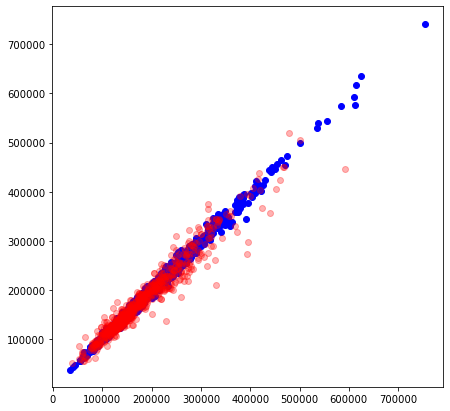

In [163]:
pred_train = 10**cat.predict(x_train);
pred_test = 10**cat.predict(x_test);

figure(figsize=(7,7));
plt.scatter(10**y_train, pred_train, color = 'b');
plt.scatter(10**y_test, pred_test, color = 'r', alpha=0.3);
plt.show();

In [165]:
### How many of the test datas are within 20% error?
print(sum(abs((pred_test-10**y_test)/10**y_test) <= 0.2)/y_test.shape[0]*100, "percent of the test data are predicted with < 20% error.")
print(sum(abs((pred_test-10**y_test)/10**y_test) <= 0.1)/y_test.shape[0]*100, "percent of the test data are predicted with < 10% error.") # ~78.2% of the test data have error < 10%
print(sum(abs((pred_test-10**y_test)/10**y_test) <= .05)/y_test.shape[0]*100, "percent of the test data are predicted with <  5% error.") # ~49.6% of the test data have error < 5%

96.12817089452604 percent of the test data are predicted with < 20% error.
80.24032042723631 percent of the test data are predicted with < 10% error.
52.20293724966623 percent of the test data are predicted with <  5% error.


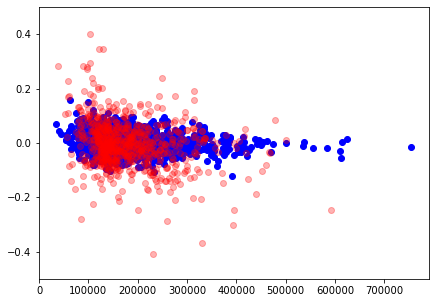

In [166]:
figure(figsize=(7,5));
plt.scatter(10**y_train, (pred_train-10**y_train)/10**y_train, color = 'b');
plt.scatter(10**y_test, (pred_test-10**y_test)/10**y_test, color = 'r', alpha=0.3);
plt.ylim([-0.5,0.5]);
plt.show();

In [167]:
training_accuracy_1 = [];
testing_accuracy_1 = [];
training_accuracy_2 = [];
testing_accuracy_2 = [];

for i in range(100):
    print(i, "-th trial without vincinity information")
    x_train, x_test, y_train, y_test = train_test_split(x, ylog, test_size=0.3);
    
    cat = CatBoostRegressor();
    cat.set_params(verbose=0);
    cat.fit(x_train, y_train);
    
    training_accuracy_1.append(cat.score(x_train, y_train));
    testing_accuracy_1.append(cat.score(x_test, y_test));
    
for i in range(100):
    print(i, "-th trial with vincinity information")
    x_train, x_test, y_train, y_test = train_test_split(x2, ylog, test_size=0.3);
    
    cat = CatBoostRegressor();
    cat.set_params(verbose=0);
    cat.fit(x_train, y_train);
    
    training_accuracy_2.append(cat.score(x_train, y_train));
    testing_accuracy_2.append(cat.score(x_test, y_test));


0 -th trial without vincinity information
1 -th trial without vincinity information
2 -th trial without vincinity information
3 -th trial without vincinity information
4 -th trial without vincinity information
5 -th trial without vincinity information
6 -th trial without vincinity information
7 -th trial without vincinity information
8 -th trial without vincinity information
9 -th trial without vincinity information
10 -th trial without vincinity information
11 -th trial without vincinity information
12 -th trial without vincinity information
13 -th trial without vincinity information
14 -th trial without vincinity information
15 -th trial without vincinity information
16 -th trial without vincinity information
17 -th trial without vincinity information
18 -th trial without vincinity information
19 -th trial without vincinity information
20 -th trial without vincinity information
21 -th trial without vincinity information
22 -th trial without vincinity information
23 -th trial without 

98 -th trial with vincinity information
99 -th trial with vincinity information


In [168]:
print(sum(training_accuracy_1)/len(training_accuracy_1))
print(sum(training_accuracy_2)/len(training_accuracy_2))
print(sum(testing_accuracy_1)/len(testing_accuracy_1))
print(sum(testing_accuracy_2)/len(testing_accuracy_2))


0.991445866231402
0.9923835410977844
0.940466585394943
0.9391576783714167
